In [19]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pydot
from IPython.core.display import Image

In [20]:
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

In [21]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
feature_names = df.columns[:-1]

In [23]:
X = df.iloc[:, :-1]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
clf = tree.DecisionTreeClassifier()
tree_nottuned = clf.fit(X_train, y_train)

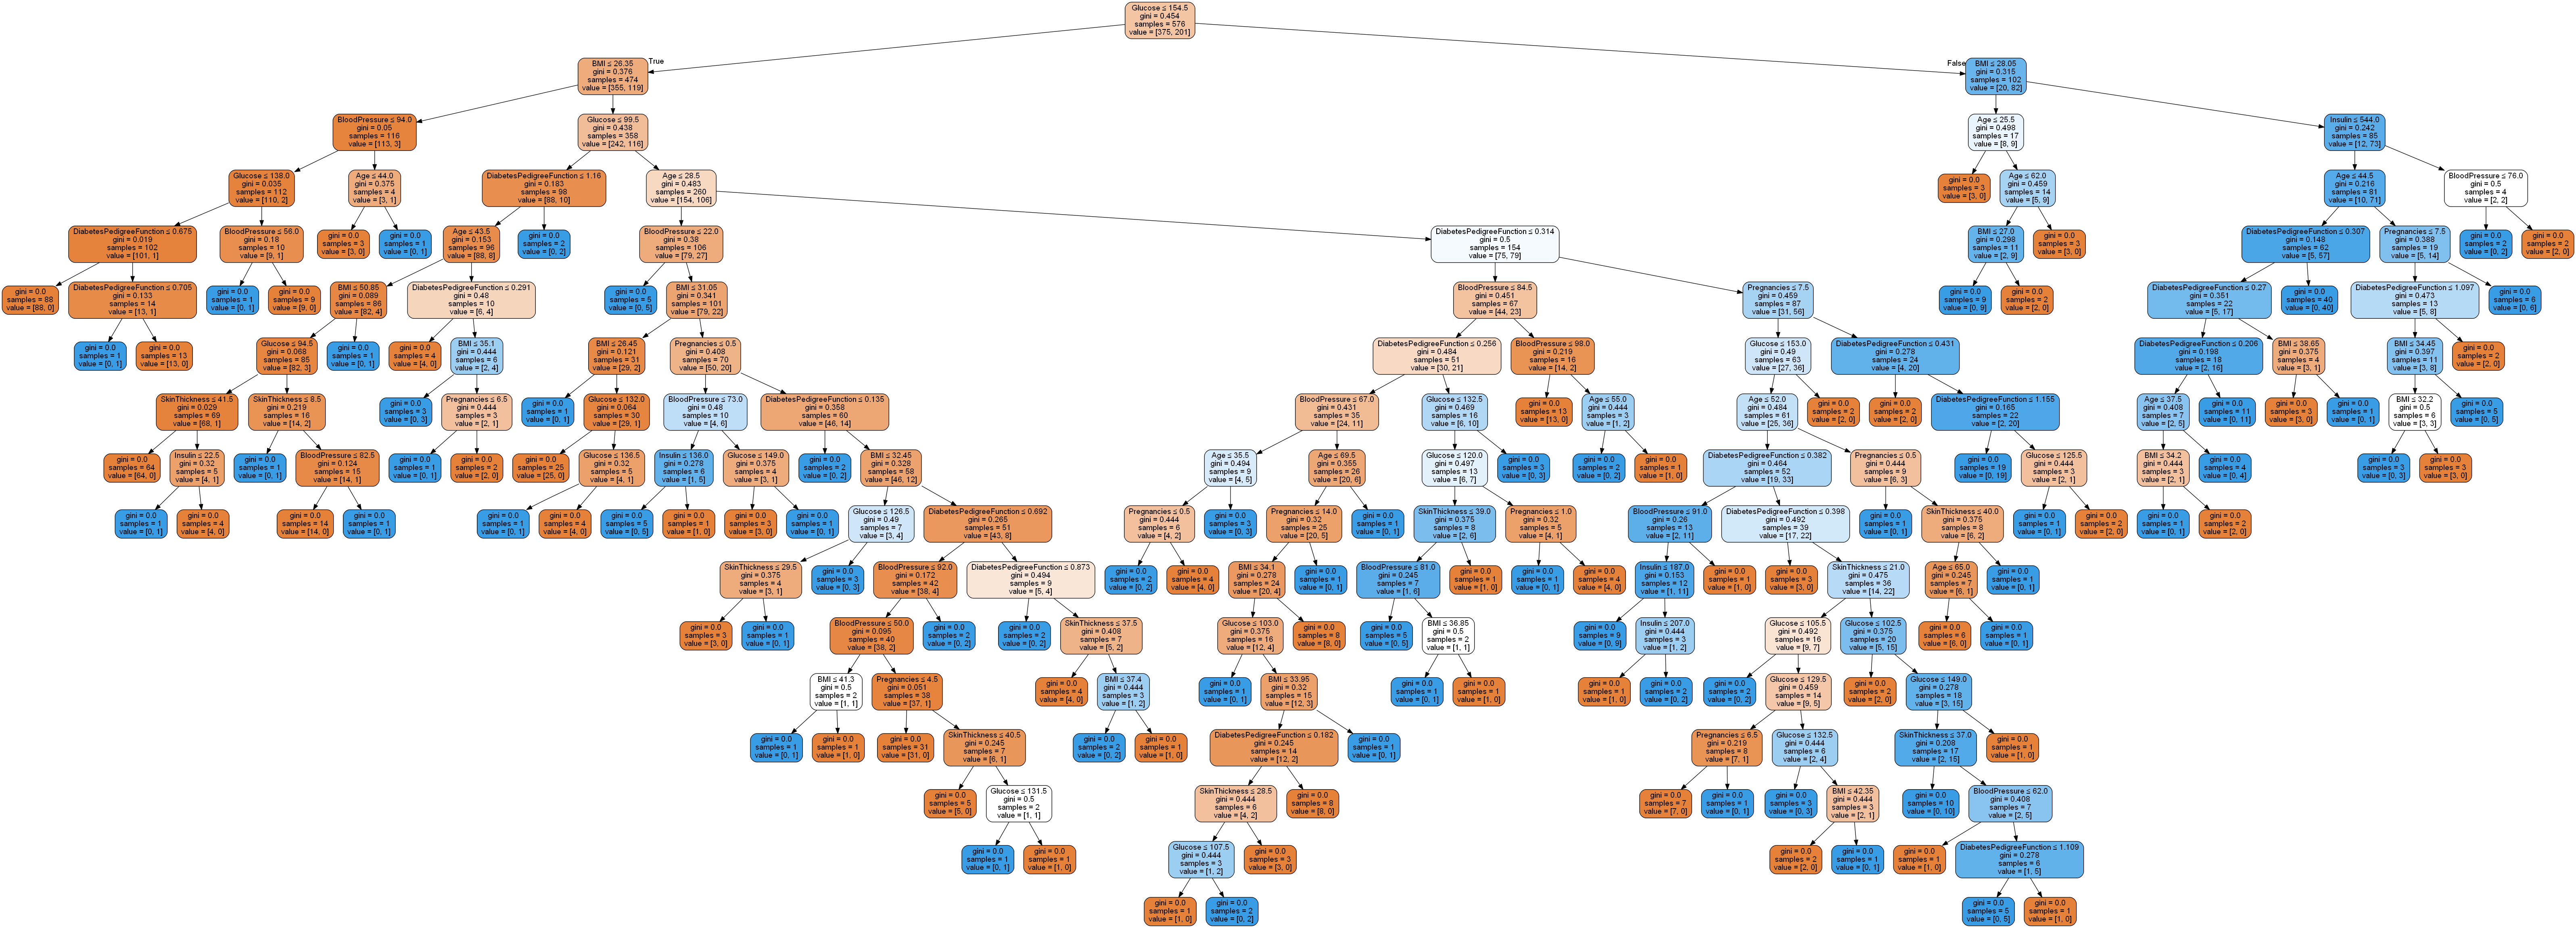

In [25]:
draw_decision_tree(tree_nottuned, feature_names)

In [26]:
Y_pred = tree_nottuned.predict(X_test)

In [27]:
accuracy_score(Y_pred , y_test)

0.6875

In [28]:
hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(2, 20))}
GridCV = GridSearchCV(estimator=tree_nottuned, param_grid=hyperparamters, cv=5, verbose=1)
GridCV.fit(X_train, y_train)
GridCV.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    3.0s finished


{'max_depth': 2, 'min_samples_split': 2}

In [29]:
tree_tuned = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2)
tree_tuned = tree_tuned.fit(X_train, y_train)

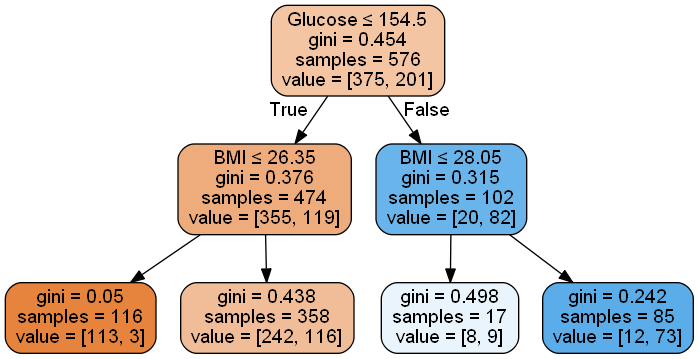

In [30]:
draw_decision_tree(tree_tuned, feature_names)

In [31]:
Y_pred = tree_tuned.predict(X_test)

In [32]:
accuracy_score(Y_pred , y_test)

0.7135416666666666